In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
df = pd.read_csv("Housing.csv")

In [78]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [149]:
set(df['Fence'])

{'GdPrv', 'GdWo', 'MnPrv', 'MnWw', nan}

In [148]:
df['PoolArea']

0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Name: PoolArea, Length: 1460, dtype: int64

In [98]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['LotShape'] = le.fit_transform(df['LotShape'])

In [102]:
le_LandContour = LabelEncoder()
df['LandContour'] = le_LandContour.fit_transform(df['LandContour'])

In [105]:
le_SaleType = LabelEncoder()
df['SaleType'] = le_SaleType.fit_transform(df['SaleType'])

In [107]:
le_SaleCondition = LabelEncoder()
df['SaleCondition'] = le_SaleCondition.fit_transform(df['SaleCondition'])

In [127]:
le_MSZoning = LabelEncoder()
df['MSZoning'] = le_MSZoning.fit_transform(df['MSZoning'])

In [137]:
le_Street = LabelEncoder()
df['Street'] = le_Street.fit_transform(df['Street'])

In [150]:
le_Fence = LabelEncoder()
df['Fence'] = le_Fence.fit_transform(df['Fence'])

In [151]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,NaN,3,3,AllPub,...,0,NaN,4,NaN,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,NaN,3,3,AllPub,...,0,NaN,4,NaN,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,NaN,0,3,AllPub,...,0,NaN,4,NaN,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,NaN,0,3,AllPub,...,0,NaN,4,NaN,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,NaN,0,3,AllPub,...,0,NaN,4,NaN,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,NaN,3,3,AllPub,...,0,NaN,4,NaN,0,8,2007,8,4,175000
1456,1457,20,3,85.0,13175,1,NaN,3,3,AllPub,...,0,NaN,2,NaN,0,2,2010,8,4,210000
1457,1458,70,3,66.0,9042,1,NaN,3,3,AllPub,...,0,NaN,0,Shed,2500,5,2010,8,4,266500
1458,1459,20,3,68.0,9717,1,NaN,3,3,AllPub,...,0,NaN,4,NaN,0,4,2010,8,4,142125


In [170]:
x = df[['MSSubClass','MSZoning','Street','LotFrontage', 'LotArea', 'Fence','PoolArea', 'LotShape','LandContour','YrSold', 'SaleType','SaleCondition']]
x.isnull().sum()

MSSubClass       0
MSZoning         0
Street           0
LotFrontage      0
LotArea          0
Fence            0
PoolArea         0
LotShape         0
LandContour      0
YrSold           0
SaleType         0
SaleCondition    0
dtype: int64

In [171]:
y = df['SalePrice']
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [172]:
from sklearn.feature_selection import mutual_info_regression
mir = mutual_info_regression(x , y)

In [173]:
mir

array([0.28297819, 0.13223318, 0.        , 0.19284591, 0.15788723,
       0.05221003, 0.        , 0.09078536, 0.04893421, 0.        ,
       0.06822369, 0.07898745])

In [174]:
mir_series = pd.Series(mir)

In [175]:
mir_series

0     0.282978
1     0.132233
2     0.000000
3     0.192846
4     0.157887
5     0.052210
6     0.000000
7     0.090785
8     0.048934
9     0.000000
10    0.068224
11    0.078987
dtype: float64

In [176]:
mir_series.index = x.columns

In [177]:
mir_series

MSSubClass       0.282978
MSZoning         0.132233
Street           0.000000
LotFrontage      0.192846
LotArea          0.157887
Fence            0.052210
PoolArea         0.000000
LotShape         0.090785
LandContour      0.048934
YrSold           0.000000
SaleType         0.068224
SaleCondition    0.078987
dtype: float64

In [178]:
mir_series = mir_series.sort_values(ascending=False)

In [179]:
mir_series

MSSubClass       0.282978
LotFrontage      0.192846
LotArea          0.157887
MSZoning         0.132233
LotShape         0.090785
SaleCondition    0.078987
SaleType         0.068224
Fence            0.052210
LandContour      0.048934
Street           0.000000
PoolArea         0.000000
YrSold           0.000000
dtype: float64

In [180]:
mutual_information_data = pd.DataFrame({'Variable' : mir_series.index , 'Value' : mir_series.values})

In [181]:
mutual_information_data

,Variable,Value
0,MSSubClass,0.282978
1,LotFrontage,0.192846
2,LotArea,0.157887
3,MSZoning,0.132233
4,LotShape,0.090785
5,SaleCondition,0.078987
6,SaleType,0.068224
7,Fence,0.052210
8,LandContour,0.048934
9,Street,0.000000


In [182]:
import seaborn as sns
import matplotlib.pyplot as plt

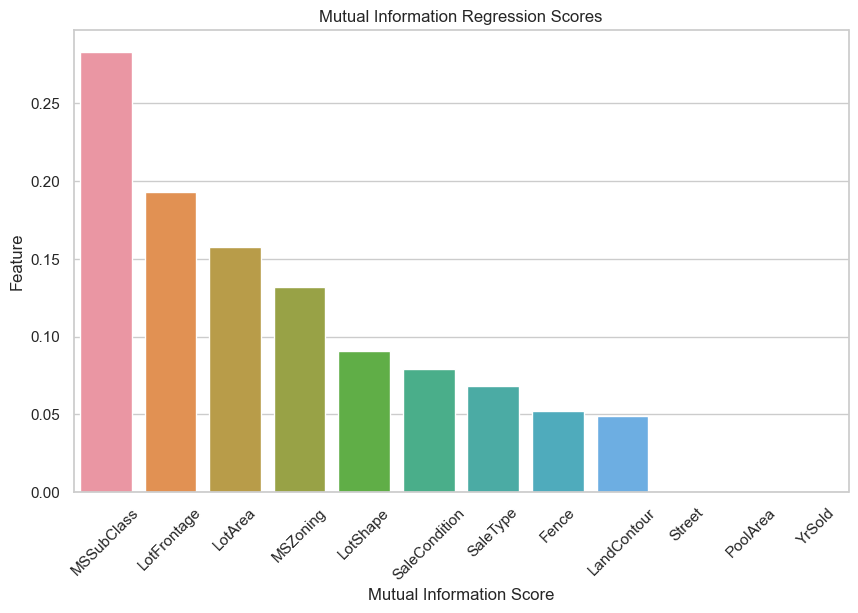

In [186]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot( x ='Variable',y ='Value', data=mutual_information_data)
plt.xlabel('Mutual Information Score')
plt.ylabel('Feature')
plt.title('Mutual Information Regression Scores')
plt.xticks(rotation=45)
plt.show()

In [187]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.model_selection import train_test_split

In [188]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
k_best = 5  # Choose the number of top features you want to select
selector = SelectKBest(mutual_info_regression, k=k_best)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

In [189]:
# Get the selected feature indices
selected_indices = selector.get_support(indices=True)

# Display the selected feature names
selected_features = x.columns[selected_indices]
print(f"Selected features: {list(selected_features)}")

Selected features: ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'SaleType']
